# Merge all

In [1]:
import pandas as pd
import os

# Ganti path ini sesuai lokasi ekstraksi ZIP Anda
extract_path = "./Output/CLIP/CLIPResult"

all_data = []

for folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, file))
            df['Prompt_Variant'] = folder
            all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)
combined_df.to_csv("combined_CLIP_scores.csv", index=False)
combined_df.head()


,Rank,Image,Score,Positive,Negative,Prompt_Variant
0,1,Untitled (43).png,0.218178,0.351829,0.133651,V10 1.3.5 Pers Mid
1,2,Untitled (3).png,0.215789,0.354236,0.138447,V10 1.3.5 Pers Mid
2,3,Untitled (5).png,0.209641,0.359350,0.149709,V10 1.3.5 Pers Mid
3,4,Dzine72.PNG,0.208833,0.370559,0.161726,V10 1.3.5 Pers Mid
4,5,Untitled (63).png,0.208328,0.380628,0.172300,V10 1.3.5 Pers Mid


# Visualisation of Score Each Prompt

C:\Users\Pongo\AppData\Local\Temp\ipykernel_7712\3585532159.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')


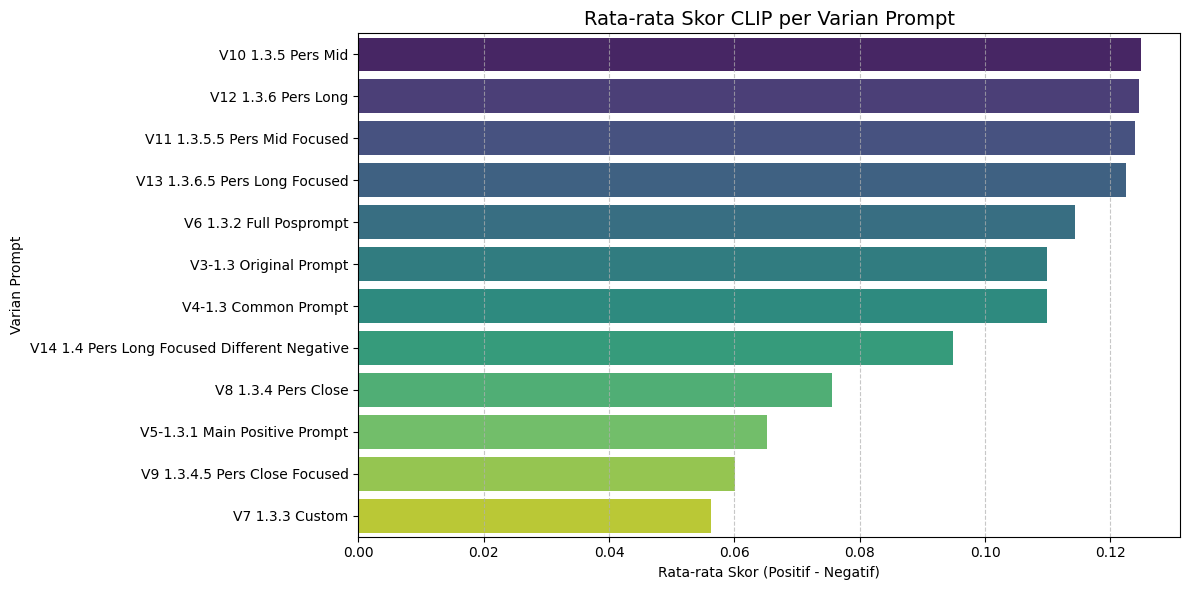

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_scores = combined_df.groupby('Prompt_Variant')['Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')
plt.title("Rata-rata Skor CLIP per Varian Prompt", fontsize=14)
plt.xlabel("Rata-rata Skor (Positif - Negatif)")
plt.ylabel("Varian Prompt")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Top 10 Good Image

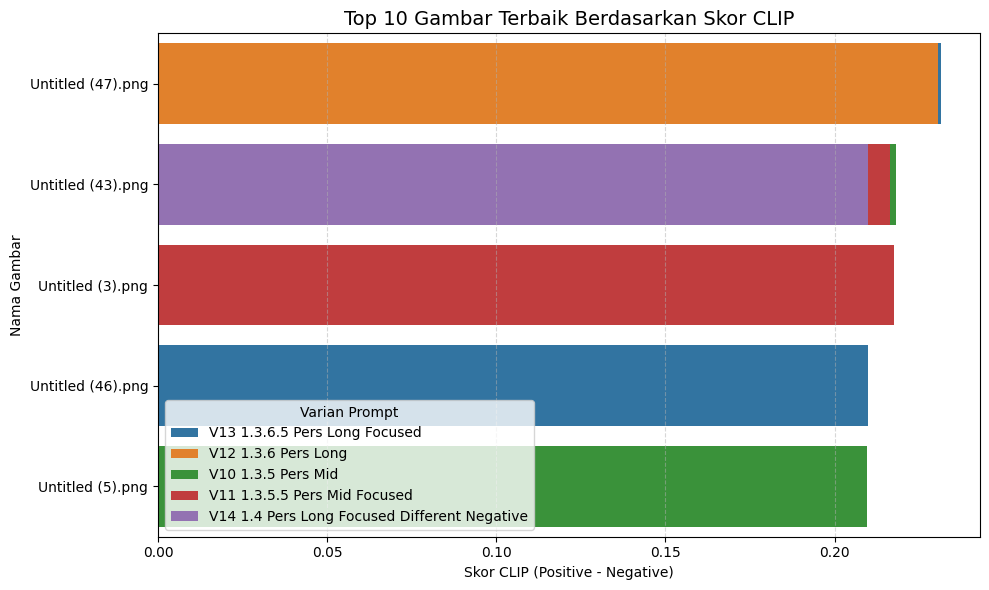

In [4]:
top10 = combined_df.sort_values(by="Score", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top10['Image'], x=top10['Score'], hue=top10['Prompt_Variant'], dodge=False)
plt.title("Top 10 Gambar Terbaik Berdasarkan Skor CLIP", fontsize=14)
plt.xlabel("Skor CLIP (Positive - Negative)")
plt.ylabel("Nama Gambar")
plt.legend(title='Varian Prompt')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


# Save Score > 0.23

In [6]:
good_images = combined_df[combined_df['Score'] > 0.23]
good_images.to_csv("filtered_good_images.csv", index=False)
good_images.head()


,Rank,Image,Score,Positive,Negative,Prompt_Variant
108,1,Untitled (47).png,0.230675,0.364927,0.134253,V12 1.3.6 Pers Long
162,1,Untitled (47).png,0.231444,0.365696,0.134253,V13 1.3.6.5 Pers Long Focused
